In [1]:
import numpy as np
import scipy
import scipy.signal
import thinkdsp
import thinkplot
import urllib.request



%matplotlib inline
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

No handles with labels found to put in legend.


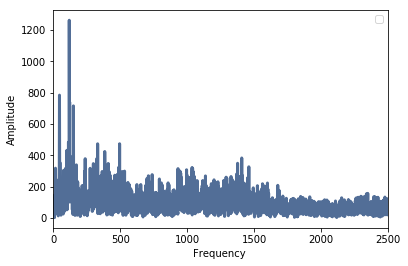

In [2]:
truck_audio = '/Users/nawazkh/Masters/Courses/CSCI-B649_Internet_Of_Things/FinalProject/truck-audioset/1secChunks/truck/Truck-1.wav'

truck_wav = thinkdsp.read_wave(truck_audio)

truck_wav.make_spectrum().plot()

thinkplot.config(xlabel='Frequency ',
                     ylabel='Amplitude',xlim=[0,2500] )


In [3]:
import matplotlib.pyplot as plt
from scipy.io import wavfile # get the api
from scipy.fftpack import fft
from pylab import *

def f(filename):
    fs, data = wavfile.read(filename)# load the data
    a = data                         # this is a two channel soundtrack, I get the first track
#     b=[(ele/2**8.)*2-1 for ele in a] # this is 8-bit track, b is now normalized on [-1,1)
    c = fft(data)                       # create a list of complex number
    d = len(c)/2                     # you only need half of the fft list
    print ('d',d)
    absfft = abs(c[:int(d-1)])
#     plt.plot(absfft,'r')
#     plt.plot(absfft,'r')
#     plt.xlim((0,1000))
#     plt.show()

In [4]:
import glob
truck_aud_file = '/Users/nawazkh/Masters/Courses/CSCI-B649_Internet_Of_Things/FinalProject/truck-audioset/1secChunks/truck/Truck-1.wav'
f(truck_aud_file)
# for wf in glob.glob(truck_dir+'*.wav'):
# #     print wf
#     f(wf)

d 22050.0


In [5]:
import logging
import math
import numpy as np
import os
import pydub  
import scipy
import scipy.signal as signal
import sys
# import urllib.request

%matplotlib inline
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython.display import Audio

import thinkdsp
import thinkplot

In [6]:
filename = '/Users/nawazkh/Masters/Courses/CSCI-B649_Internet_Of_Things/FinalProject/truck-audioset/1secChunks/truck/Truck-1.wav'

truck_wav = thinkdsp.read_wave(filename)
truck_wav.make_audio()
framerate = truck_wav.framerate

print ('Framefrate: ', framerate)

Framefrate:  44100


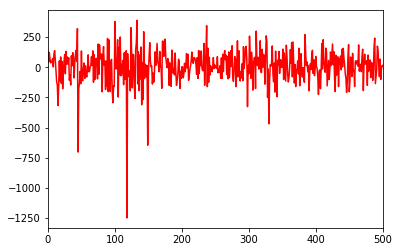

In [7]:
# fs, data = wavfile.read(filename)

N = len(truck_wav.ys)
d = 1./framerate

hs = np.fft.rfft(truck_wav.ys)
fs = np.fft.rfftfreq(N,d)
       

# low_hs = np.fft.rfft(low.ys)
_ = plt.plot(fs, hs.real, color='red' )
# _ = plt.plot(fs, low_hs.real, color='red', alpha=0.5, )
_ = plt.xlim([0, 500])
plt.show()

In [8]:
import matplotlib.pyplot as plt
from scipy.io import wavfile # get the api
from scipy.fftpack import fft
from pylab import *

def ffftplot(filename):
    fs, data = wavfile.read(filename) # load the data
#     print 'data shape: ', data.shape
    a = data.T[0] # this is a two channel soundtrack, I get the first track
#     b=[(ele/2**8.)*2-1 for ele in a] # this is 8-bit track, b is now normalized on [-1,1)
    c = fft(a) # create a list of complex number
    print ('fftshape: ', c.shape)
    print ('fftlen: ', len(c))
    d = len(c)/2  # you only need half of the fft list
    plt.plot(abs(c[:(d-1)]),'r')
#     plt.plot(abs(c),'r')
#     plt.xlim((0,2000))
    plt.show()
    
    c_abs = np.absolute(c[:int(d-1)])
    print ('absolute c: ', c_abs)
    mcr = np.mean(c_abs)
    print ('MEAN: ', mcr  )
    print ('MAX : ', np.max(c_abs))
#     collection = [x for x in c_abs if x >= ((12.75*mcr)) ]
    collection={}
    for i in range(len(c_abs)):
        if(c_abs[i] >= ((12.75*mcr))):
            collection[i] = c_abs[i]
#     print 'short listed: ',collection
    print ('short listed len: ',len(collection), '  len original: ', len(c_abs))
#     print 'Key Value pairs:',collection
    hl = len(collection.values())/2
    plt.plot(collection.values()[:hl-1],'g')
#     plt.xlim((0,2000))   
    plt.show()

In [193]:
def find_prominent_freqeuencies(filename):
    print ('in function filename: ', filename)
#     collection = {}
#     truck_wav = thinkdsp.read_wave(filename)
#     truck_wav.make_audio()

    fs, data = wavfile.read(filename) # load the data
    print ('monon/stereo : ', data.shape)
    if len(data.shape) > 1:
        a1 = data.T[0] # this is a two channel soundtrack, I get the first track
        a = a1[:1024]
    else:
        a1 = data
        a = a1[:1024]
#     c1 = [403198.0037689209 ,
# 253733.00909996033 ,
# 107869.99762058258 ,
# 91964.99735116959 ,
# 39280.99945187569 ,
# 82345.99977731705 ,
# 49695.998430252075 ,
# 55257.998406887054 ,
# 41825.998574495316 ,
# 13961.99967712164 ,
# 21889.999508857727 ,
# 31831.00000023842 ,
# 21221.00070118904 ,
# 15816.999599337578 ,
# 42957.99881219864 ,
# 63267.00001955032 ,
# 20062.999799847603 ,
# 44089.99904990196 ,
# 27530.99985420704 ,
# 14174.000360071659 ,
# 43340.00125527382 ,
# 42249.00156259537 ,
# 22382.00046122074 ,
# 33404.00010347366 ,
# 16310.000792145729 ,
# 6881.000008434057 ,
# 14461.000449955463 ,
# 33371.999859809875 ,
# 5160.000175237656 ,
# 14917.000196874142 ,
# 2023.0000372976065 ,
# 10990.999639034271 ,
# 17971.999943256378 ,
# 29324.00070130825 ,
# 12161.999940872192 ,
# 32202.00166106224 ,
# 20769.00005340576 ,
# 12927.000410854816 ,
# 9867.999702692032 ,
# 33197.99900054932 ,
# 14515.99970459938 ,
# 19334.999844431877 ,
# 15216.999687254429 ,
# 4763.999953866005 ,
# 17627.00080871582 ,
# 3389.999968931079 ,
# 17001.99954211712 ,
# 45981.00110888481 ,
# 23685.9992146492 ,
# 31137.000769376755 ,
# 29858.000576496124 ,
# 54944.999516010284 ,
# 9451.000019907951 ,
# 6852.999795228243 ,
# 18113.000318408012 ,
# 28457.000851631165 ,
# 19665.999338030815 ,
# 10149.000212550163 ,
# 23917.000740766525 ,
# 26109.00066792965 ,
# 10014.000348746777 ,
# 14871.999621391296 ,
# 15324.000269174576 ,
# 18551.99970304966 ,
# 17709.000036120415 ,
# 15545.999631285667 ,
# 22841.00092947483 ,
# 27157.999575138092 ,
# 11943.9996778965 ,
# 24004.999548196793 ,
# 36226.99901461601 ,
# 27433.00050497055 ,
# 13752.99971550703 ,
# 2809.9999763071537 ,
# 6053.000222891569 ,
# 3611.000021919608 ,
# 3431.0000482946634 ,
# 7495.999801903963 ,
# 3833.0000825226307 ,
# 17773.00052344799 ,
# 7408.999837934971 ,
# 22097.9992300272 ,
# 19721.999764442444 ,
# 11152.000166475773 ,
# 10839.000344276428 ,
# 5743.999965488911 ,
# 14584.00022238493 ,
# 14554.000459611416 ,
# 6107.000168412924 ,
# 12618.999928236008 ,
# 5640.9998796880245 ,
# 12369.999662041664 ,
# 10575.000196695328 ,
# 3804.0000945329666 ,
# 6424.000021070242 ,
# 6705.999840050936 ,
# 10506.000369787216 ,
# 11278.999969363213 ,
# 3611.000021919608 ,
# 21029.99947965145 ,
# 20302.999764680862 ,
# 6366.000045090914 ,
# 2072.9999523609877 ,
# 6986.00010946393 ,
# 10645.000264048576 ,
# 3539.999946951866 ,
# 1493.9999673515558 ,
# 1271.0000155493617 ,
# 3453.9999905973673 ,
# 9030.000306665897 ,
# 8081.0002982616425 ,
# 6546.999793499708 ,
# 2511.0000278800726 ,
# 2975.0000685453415 ,
# 6821.000017225742 ,
# 2480.000024661422 ,
# 4104.999825358391 ,
# 8368.99969726801 ,
# 3186.000045388937 ,
# 3461.000043898821 ,
# 4949.99997317791 ,
# 3641.0000175237656 ,
# 5716.999992728233 ,
# 15854.999423027039 ,
# 8531.000465154648 ,
# 3290.9999135881662 ,
# 4149.000160396099 ,
# 3555.0000611692667 ,
# 8046.000264585018 ,
# 1894.9999939650297 ,
# 10120.999999344349 ,
# 2806.9999534636736 ,
# 6037.000101059675 ,
# 7275.000214576721 ,
# 7674.000225961208 ,
# 6368.99983510375 ,
# 4610.000178217888 ,
# 3495.000069960952 ,
# 6924.0001030266285 ,
# 12958.000414073467 ,
# 15794.999897480011 ,
# 5439.999978989363 ,
# 14537.000097334385 ,
# 6963.999941945076 ,
# 3514.9999894201756 ,
# 12040.999718010426 ,
# 7342.999801039696 ,
# 9394.00028437376 ,
# 17191.000282764435 ,
# 12357.000261545181 ,
# 9417.999535799026 ,
# 9539.99999910593 ,
# 14836.999587714672 ,
# 11978.999711573124 ,
# 8938.999846577644 ,
# 6388.000212609768 ,
# 9274.999611079693 ,
# 1867.000013589859 ,
# 5001.999903470278 ,
# 11466.000229120255 ,
# 5136.9997672736645 ,
# 4976.0001711547375 ,
# 2317.999955266714 ,
# 9945.999830961227 ,
# 4067.9997764527798 ,
# 1443.0000446736813 ,
# 9309.999644756317 ,
# 8564.000017940998 ,
# 7687.999866902828 ,
# 9875.000454485416 ,
# 4954.000003635883 ,
# 7753.999903798103 ,
# 10471.000336110592 ,
# 4840.9998416900635 ,
# 1972.000114619732 ,
# 1783.9999636635184 ,
# 2812.999999150634 ,
# 1569.9999639764428 ,
# 5113.000050187111 ,
# 5669.000092893839 ,
# 1476.9999543204904 ,
# 544.0000095404685 ,
# 7387.999910861254 ,
# 2129.9999207258224 ,
# 3514.9999894201756 ,
# 2561.999950557947 ,
# 5909.999832510948 ,
# 8681.000210344791 ,
# 9068.000130355358 ,
# 12151.000089943409 ,
# 6558.000110089779 ,
# 9131.000377237797 ,
# 13305.0000295043 ,
# 11611.999943852425 ,
# 3198.999911546707 ,
# 6519.000045955181 ,
# 8361.9998767972 ,
# 8190.999738872051 ,
# 5404.999945312738 ,
# 5927.999969571829 ,
# 4100.000020116568 ,
# 3768.000053241849 ,
# 3562.0001144707203 ,
# 9185.999631881714 ,
# 6763.000041246414 ,
# 5421.999841928482 ,
# 2903.9999935775995 ,
# 13605.999760329723 ,
# 4645.999986678362 ,
# 9327.000007033348 ,
# 11624.000035226345 ,
# 8453.000336885452 ,
# 8315.999992191792 ,
# 5301.000084728003 ,
# 4798.999987542629 ,
# 6862.000096589327 ,
# 3899.9998942017555 ,
# 4236.000124365091 ,
# 12151.000089943409 ,
# 9963.000193238258 ,
# 11951.999738812447 ,
# 2812.999999150634 ,
# 1202.9999634250998 ,
# 6297.999992966652 ,
# 3262.9999332129955 ,
# 8344.000205397606 ,
# 5169.000010937452 ,
# 4885.9999515116215 ,
# 2430.9998843818903 ,
# 3547.0000002533197 ,
# 4999.000113457441 ,
# 9521.0000872612 ,
# 3945.0000040233135 ,
# 2540.0000158697367 ,
# 4695.000126957893 ,
# 7872.000336647034 ,
# 5259.000230580568 ,
# 8364.000357687473 ,
# 12440.99996984005 ,
# 5158.999934792519 ,
# 2122.000092640519 ,
# 2247.9998879134655 ,
# 6998.9999756217 ,
# 3531.999886035919 ,
# 3793.0000107735395 ,
# 7829.999551177025 ,
# 6804.000120609999 ,
# 2698.000054806471 ,
# 6246.999837458134 ,
# 3102.000104263425 ,
# 2866.9999446719885 ,
# 11946.000158786774 ,
# 6988.000124692917 ,
# 7247.000001370907 ,
# 7501.000072807074 ,
# 9693.999774754047 ,
# 4660.999868065119 ,
# 4329.000134021044 ,
# 6864.000111818314 ,
# 6246.999837458134 ,
# 7648.99980276823 ,
# 5778.000224381685 ,
# 6688.999943435192 ,
# 10068.000294268131 ,
# 3885.0000128149986 ,
# 1517.0000260695815 ,
# 3050.9999487549067 ,
# 11718.999594449997 ,
# 1106.0000397264957 ,
# 3051.9999563694 ,
# 2167.999977245927 ,
# 2858.000108972192 ,
# 7178.999949246645 ,
# 794.9999999254942 ,
# 7191.999815404415 ,
# 6707.000080496073 ,
# 8429.000154137611 ,
# 8960.000239312649 ,
# 7143.999915570021 ,
# 796.0000075399876 ,
# 4478.000104427338 ,
# 2390.0000378489494 ,
# 4980.000201612711 ,
# 3938.0001835525036 ,
# 3965.000156313181 ,
# 6116.99977889657 ,
# 3461.000043898821 ,
# 5045.999772846699 ,
# 4511.000122874975 ,
# 3264.9999484419823 ,
# 6467.999890446663 ,
# 7596.000097692013 ,
# 2857.0001013576984 ,
# 4331.99992403388 ,
# 8829.999715089798 ,
# 5295.000039041042 ,
# 3085.999982431531 ,
# 1769.999973475933 ,
# 3109.999932348728 ,
# 5824.999883770943 ,
# 2912.0000544935465 ,
# 2836.999949067831 ,
# 526.999996509403 ,
# 213.99999968707561 ,
# 1775.0000115484 ,
# 1092.0000495389104 ,
# 5235.000047832727 ,
# 10107.999667525291 ,
# 6792.999804019928 ,
# 753.9999787695706 ,
# 2143.0000197142363 ,
# 6626.9999369978905 ,
# 7579.999975860119 ,
# 1846.9999777153134 ,
# 1101.000001654029 ,
# 7333.000190556049 ,
# 5489.000119268894 ,
# 4896.999802440405 ,
# 2916.00008495152 ,
# 8275.000378489494 ,
# 12382.999993860722 ,
# 12602.999806404114 ,
# 11531.000025570393 ,
# 1655.0000291317701 ,
# 3654.999891296029 ,
# 8252.999745309353 ,
# 14379.999600350857 ,
# 6715.00014141202 ,
# 4734.999965876341 ,
# 6504.000164568424 ,
# 2166.9999696314335 ,
# 7734.999991953373 ,
# 11951.000429689884 ,
# 11010.999791324139 ,
# 10599.000379443169 ,
# 5874.000024050474 ,
# 7114.999927580357 ,
# 4784.000106155872 ,
# 4550.000187009573 ,
# 499.0000161342323 ,
# 11164.999566972256 ,
# 10068.000294268131 ,
# 7007.999811321497 ,
# 2178.0000533908606 ,
# 3702.000016346574 ,
# 14333.000406622887 ,
# 9829.999879002571 ,
# 9633.000008761883 ,
# 2760.0000612437725 ,
# 4867.000039666891 ,
# 7984.0002581477165 ,
# 2713.999943807721 ,
# 3062.0000325143337 ,
# 6827.999837696552 ,
# 3591.0001024603844 ,
# 3216.0000409930944 ,
# 6959.9999114871025 ,
# 3938.0001835525036 ,
# 8941.000327467918 ,
# 9465.999901294708 ,
# 11675.000190734863 ,
# 7594.000082463026 ,
# 3708.000062033534 ,
# 6622.000131756067 ,
# 8328.000083565712 ,
# 12006.999924778938 ,
# 8736.999705433846 ,
# 10079.000145196915 ,
# 14976.000413298607 ,
# 5644.999910145998 ,
# 19144.000485539436 ,
# 16699.999570846558 ,
# 842.0000085607171 ,
# 3609.0000066906214 ,
# 7211.000192910433 ,
# 5051.000043749809 ,
# 1812.9999516531825 ,
# 2621.999941766262 ,
# 3176.9999768584967 ,
# 20564.99943137169 ,
# 9602.000005543232 ,
# 11160.00022739172 ,
# 9132.999926805496 ,
# 7143.999915570021 ,
# 7408.000063151121 ,
# 7610.99997907877 ,
# 3227.9998995363712 ,
# 4052.999895066023 ,
# 5353.99978980422 ,
# 1295.9999730810523 ,
# 11366.999708116055 ,
# 13670.000247657299 ,
# 3150.0000040978193 ,
# 3253.0000898987055 ,
# 9421.000257134438 ,
# 13377.999886870384 ,
# 30974.99907016754 ,
# 24470.999836921692 ,
# 13729.000464081764 ,
# 14399.000443518162 ,
# 16505.999490618706 ,
# 7406.999822705984 ,
# 26218.999177217484 ,
# 19466.999918222427 ,
# 15227.00022906065 ,
# 10482.000187039375 ,
# 13639.99955356121 ,
# 17764.000222086906 ,
# 10006.00028783083 ,
# 1886.0000418499112 ,
# 10173.999704420567 ,
# 11229.000054299831 ,
# 15409.000217914581 ,
# 7325.999904423952 ,
# 9406.00037574768 ,
# 6246.000062674284 ,
# 4042.999818921089 ,
# 6206.0002237558365 ,
# 4976.999945938587 ,
# 11168.99959743023 ,
# 13980.99958896637 ,
# 8217.999711632729 ,
# 19387.999549508095 ,
# 14550.000429153442 ,
# 3626.9999109208584 ,
# 25840.999558568 ,
# 28251.999989151955 ,
# 38867.998868227005 ,
# 54467.99844503403 ,
# 55447.99938797951 ,
# 25126.999244093895 ,
# 39099.99877214432 ,
# 45999.00171160698 ,
# 18169.99912261963 ,
# 57176.99974775314 ,
# 27417.000383138657 ,
# 19669.000059366226 ,
# 26209.00049805641 ,
# 7976.00019723177 ,
# 19491.00010097027 ,
# 21500.999107956886 ,
# 26061.000302433968 ,
# 34531.00100159645 ,
# 20766.999572515488 ,
# 21376.999095082283 ,
# 12621.000409126282 ,
# 7786.999922245741 ,
# 10405.000299215317 ,
# 15471.000224351883 ,
# 19972.000271081924 ,
# 8485.999889671803 ,
# 16947.999596595764 ,
# 3854.000009596348 ,
# 20716.000348329544 ,
# 23556.99986219406 ,
# 13209.999538958073 ,
# 7814.999669790268 ,
# 15488.999895751476 ,
# 14884.999953210354 ,
# 26771.999895572662 ,
# 35130.999982357025 ,
# 36717.0013487339 ,
# 7552.000228315592 ,
# 33590.998500585556 ,
# 25968.000292778015 ,
# 23522.99913764 ,
# 32724.00051355362 ,
# 11030.999943614006 ,
# 9561.999700963497 ,
# 3606.9999914616346 ,
# 9364.999830722809 ,
# 10189.99982625246 ,
# 7364.0001937747 ,
# 14747.00029939413 ,
# 8597.999811172485 ,
# 3236.9999680668116 ,
# 11688.999831676483 ,
# 1576.000009663403 ,
# 7191.000040620565 ,
# 6372.000090777874 ,
# 4457.0001773536205 ,
# 8748.999796807766 ,
# 2942.000050097704 ,
# 11828.99996638298 ,
# 7637.999951839447 ,
# 8923.999965190887 ,
# 8450.999855995178 ,
# 6804.999895393848 ,
# 2786.0000263899565 ,
# 4081.0001082718372 ,
# 6482.99977183342 ,
# 3802.00007930398 ,
# 11699.000373482704 ,
# 3853.0000019818544 ,
# 6072.999909520149 ,
# 12608.000077307224 ,
# 4912.000149488449 ,
# 6105.999927967787 ,
# 9167.99996048212 ,
# 6360.999774187803 ,
# 9699.000045657158 ,
# 8643.999695777893 ,
# 3934.99992787838 ,
# 5994.000006467104 ,
# 2666.0000439733267 ,
# 8550.000376999378 ,
# 4579.000174999237 ,
# 6353.000178933144 ,
# 10804.999619722366 ,
# 5289.999768137932 ,
# 2014.9999763816595 ,
# 10696.000419557095 ,
# 6653.000134974718 ,
# 10696.000419557095 ,
# 2014.9999763816595 ,
# 5289.999768137932 ,
# 10804.999619722366 ,
# 6353.000178933144 ,
# 4579.000174999237 ,
# 8550.000376999378 ,
# 2666.0000439733267 ,
# 5994.000006467104 ,
# 3934.99992787838 ,
# 8643.999695777893 ,
# 9699.000045657158 ,
# 6360.999774187803 ,
# 9167.99996048212 ,
# 6105.999927967787 ,
# 4912.000149488449 ,
# 12608.000077307224 ,
# 6072.999909520149 ,
# 3853.0000019818544 ,
# 11699.000373482704 ,
# 3802.00007930398 ,
# 6482.99977183342 ,
# 4081.0001082718372 ,
# 2786.0000263899565 ,
# 6804.999895393848 ,
# 8450.999855995178 ,
# 8923.999965190887 ,
# 7637.999951839447 ,
# 11828.99996638298 ,
# 2942.000050097704 ,
# 8748.999796807766 ,
# 4457.0001773536205 ,
# 6372.000090777874 ,
# 7191.000040620565 ,
# 1576.000009663403 ,
# 11688.999831676483 ,
# 3236.9999680668116 ,
# 8597.999811172485 ,
# 14747.00029939413 ,
# 7364.0001937747 ,
# 10189.99982625246 ,
# 9364.999830722809 ,
# 3606.9999914616346 ,
# 9561.999700963497 ,
# 11030.999943614006 ,
# 32724.00051355362 ,
# 23522.99913764 ,
# 25968.000292778015 ,
# 33590.998500585556 ,
# 7552.000228315592 ,
# 36717.0013487339 ,
# 35130.999982357025 ,
# 26771.999895572662 ,
# 14884.999953210354 ,
# 15488.999895751476 ,
# 7814.999669790268 ,
# 13209.999538958073 ,
# 23556.99986219406 ,
# 20716.000348329544 ,
# 3854.000009596348 ,
# 16947.999596595764 ,
# 8485.999889671803 ,
# 19972.000271081924 ,
# 15471.000224351883 ,
# 10405.000299215317 ,
# 7786.999922245741 ,
# 12621.000409126282 ,
# 21376.999095082283 ,
# 20766.999572515488 ,
# 34531.00100159645 ,
# 26061.000302433968 ,
# 21500.999107956886 ,
# 19491.00010097027 ,
# 7976.00019723177 ,
# 26209.00049805641 ,
# 19669.000059366226 ,
# 27417.000383138657 ,
# 57176.99974775314 ,
# 18169.99912261963 ,
# 45999.00171160698 ,
# 39099.99877214432 ,
# 25126.999244093895 ,
# 55447.99938797951 ,
# 54467.99844503403 ,
# 38867.998868227005 ,
# 28251.999989151955 ,
# 25840.999558568 ,
# 3626.9999109208584 ,
# 14550.000429153442 ,
# 19387.999549508095 ,
# 8217.999711632729 ,
# 13980.99958896637 ,
# 11168.99959743023 ,
# 4976.999945938587 ,
# 6206.0002237558365 ,
# 4042.999818921089 ,
# 6246.000062674284 ,
# 9406.00037574768 ,
# 7325.999904423952 ,
# 15409.000217914581 ,
# 11229.000054299831 ,
# 10173.999704420567 ,
# 1886.0000418499112 ,
# 10006.00028783083 ,
# 17764.000222086906 ,
# 13639.99955356121 ,
# 10482.000187039375 ,
# 15227.00022906065 ,
# 19466.999918222427 ,
# 26218.999177217484 ,
# 7406.999822705984 ,
# 16505.999490618706 ,
# 14399.000443518162 ,
# 13729.000464081764 ,
# 24470.999836921692 ,
# 30974.99907016754 ,
# 13377.999886870384 ,
# 9421.000257134438 ,
# 3253.0000898987055 ,
# 3150.0000040978193 ,
# 13670.000247657299 ,
# 11366.999708116055 ,
# 1295.9999730810523 ,
# 5353.99978980422 ,
# 4052.999895066023 ,
# 3227.9998995363712 ,
# 7610.99997907877 ,
# 7408.000063151121 ,
# 7143.999915570021 ,
# 9132.999926805496 ,
# 11160.00022739172 ,
# 9602.000005543232 ,
# 20564.99943137169 ,
# 3176.9999768584967 ,
# 2621.999941766262 ,
# 1812.9999516531825 ,
# 5051.000043749809 ,
# 7211.000192910433 ,
# 3609.0000066906214 ,
# 842.0000085607171 ,
# 16699.999570846558 ,
# 19144.000485539436 ,
# 5644.999910145998 ,
# 14976.000413298607 ,
# 10079.000145196915 ,
# 8736.999705433846 ,
# 12006.999924778938 ,
# 8328.000083565712 ,
# 6622.000131756067 ,
# 3708.000062033534 ,
# 7594.000082463026 ,
# 11675.000190734863 ,
# 9465.999901294708 ,
# 8941.000327467918 ,
# 3938.0001835525036 ,
# 6959.9999114871025 ,
# 3216.0000409930944 ,
# 3591.0001024603844 ,
# 6827.999837696552 ,
# 3062.0000325143337 ,
# 2713.999943807721 ,
# 7984.0002581477165 ,
# 4867.000039666891 ,
# 2760.0000612437725 ,
# 9633.000008761883 ,
# 9829.999879002571 ,
# 14333.000406622887 ,
# 3702.000016346574 ,
# 2178.0000533908606 ,
# 7007.999811321497 ,
# 10068.000294268131 ,
# 11164.999566972256 ,
# 499.0000161342323 ,
# 4550.000187009573 ,
# 4784.000106155872 ,
# 7114.999927580357 ,
# 5874.000024050474 ,
# 10599.000379443169 ,
# 11010.999791324139 ,
# 11951.000429689884 ,
# 7734.999991953373 ,
# 2166.9999696314335 ,
# 6504.000164568424 ,
# 4734.999965876341 ,
# 6715.00014141202 ,
# 14379.999600350857 ,
# 8252.999745309353 ,
# 3654.999891296029 ,
# 1655.0000291317701 ,
# 11531.000025570393 ,
# 12602.999806404114 ,
# 12382.999993860722 ,
# 8275.000378489494 ,
# 2916.00008495152 ,
# 4896.999802440405 ,
# 5489.000119268894 ,
# 7333.000190556049 ,
# 1101.000001654029 ,
# 1846.9999777153134 ,
# 7579.999975860119 ,
# 6626.9999369978905 ,
# 2143.0000197142363 ,
# 753.9999787695706 ,
# 6792.999804019928 ,
# 10107.999667525291 ,
# 5235.000047832727 ,
# 1092.0000495389104 ,
# 1775.0000115484 ,
# 213.99999968707561 ,
# 526.999996509403 ,
# 2836.999949067831 ,
# 2912.0000544935465 ,
# 5824.999883770943 ,
# 3109.999932348728 ,
# 1769.999973475933 ,
# 3085.999982431531 ,
# 5295.000039041042 ,
# 8829.999715089798 ,
# 4331.99992403388 ,
# 2857.0001013576984 ,
# 7596.000097692013 ,
# 6467.999890446663 ,
# 3264.9999484419823 ,
# 4511.000122874975 ,
# 5045.999772846699 ,
# 3461.000043898821 ,
# 6116.99977889657 ,
# 3965.000156313181 ,
# 3938.0001835525036 ,
# 4980.000201612711 ,
# 2390.0000378489494 ,
# 4478.000104427338 ,
# 796.0000075399876 ,
# 7143.999915570021 ,
# 8960.000239312649 ,
# 8429.000154137611 ,
# 6707.000080496073 ,
# 7191.999815404415 ,
# 794.9999999254942 ,
# 7178.999949246645 ,
# 2858.000108972192 ,
# 2167.999977245927 ,
# 3051.9999563694 ,
# 1106.0000397264957 ,
# 11718.999594449997 ,
# 3050.9999487549067 ,
# 1517.0000260695815 ,
# 3885.0000128149986 ,
# 10068.000294268131 ,
# 6688.999943435192 ,
# 5778.000224381685 ,
# 7648.99980276823 ,
# 6246.999837458134 ,
# 6864.000111818314 ,
# 4329.000134021044 ,
# 4660.999868065119 ,
# 9693.999774754047 ,
# 7501.000072807074 ,
# 7247.000001370907 ,
# 6988.000124692917 ,
# 11946.000158786774 ,
# 2866.9999446719885 ,
# 3102.000104263425 ,
# 6246.999837458134 ,
# 2698.000054806471 ,
# 6804.000120609999 ,
# 7829.999551177025 ,
# 3793.0000107735395 ,
# 3531.999886035919 ,
# 6998.9999756217 ,
# 2247.9998879134655 ,
# 2122.000092640519 ,
# 5158.999934792519 ,
# 12440.99996984005 ,
# 8364.000357687473 ,
# 5259.000230580568 ,
# 7872.000336647034 ,
# 4695.000126957893 ,
# 2540.0000158697367 ,
# 3945.0000040233135 ,
# 9521.0000872612 ,
# 4999.000113457441 ,
# 3547.0000002533197 ,
# 2430.9998843818903 ,
# 4885.9999515116215 ,
# 5169.000010937452 ,
# 8344.000205397606 ,
# 3262.9999332129955 ,
# 6297.999992966652 ,
# 1202.9999634250998 ,
# 2812.999999150634 ,
# 11951.999738812447 ,
# 9963.000193238258 ,
# 12151.000089943409 ,
# 4236.000124365091 ,
# 3899.9998942017555 ,
# 6862.000096589327 ,
# 4798.999987542629 ,
# 5301.000084728003 ,
# 8315.999992191792 ,
# 8453.000336885452 ,
# 11624.000035226345 ,
# 9327.000007033348 ,
# 4645.999986678362 ,
# 13605.999760329723 ,
# 2903.9999935775995 ,
# 5421.999841928482 ,
# 6763.000041246414 ,
# 9185.999631881714 ,
# 3562.0001144707203 ,
# 3768.000053241849 ,
# 4100.000020116568 ,
# 5927.999969571829 ,
# 5404.999945312738 ,
# 8190.999738872051 ,
# 8361.9998767972 ,
# 6519.000045955181 ,
# 3198.999911546707 ,
# 11611.999943852425 ,
# 13305.0000295043 ,
# 9131.000377237797 ,
# 6558.000110089779 ,
# 12151.000089943409 ,
# 9068.000130355358 ,
# 8681.000210344791 ,
# 5909.999832510948 ,
# 2561.999950557947 ,
# 3514.9999894201756 ,
# 2129.9999207258224 ,
# 7387.999910861254 ,
# 544.0000095404685 ,
# 1476.9999543204904 ,
# 5669.000092893839 ,
# 5113.000050187111 ,
# 1569.9999639764428 ,
# 2812.999999150634 ,
# 1783.9999636635184 ,
# 1972.000114619732 ,
# 4840.9998416900635 ,
# 10471.000336110592 ,
# 7753.999903798103 ,
# 4954.000003635883 ,
# 9875.000454485416 ,
# 7687.999866902828 ,
# 8564.000017940998 ,
# 9309.999644756317 ,
# 1443.0000446736813 ,
# 4067.9997764527798 ,
# 9945.999830961227 ,
# 2317.999955266714 ,
# 4976.0001711547375 ,
# 5136.9997672736645 ,
# 11466.000229120255 ,
# 5001.999903470278 ,
# 1867.000013589859 ,
# 9274.999611079693 ,
# 6388.000212609768 ,
# 8938.999846577644 ,
# 11978.999711573124 ,
# 14836.999587714672 ,
# 9539.99999910593 ,
# 9417.999535799026 ,
# 12357.000261545181 ,
# 17191.000282764435 ,
# 9394.00028437376 ,
# 7342.999801039696 ,
# 12040.999718010426 ,
# 3514.9999894201756 ,
# 6963.999941945076 ,
# 14537.000097334385 ,
# 5439.999978989363 ,
# 15794.999897480011 ,
# 12958.000414073467 ,
# 6924.0001030266285 ,
# 3495.000069960952 ,
# 4610.000178217888 ,
# 6368.99983510375 ,
# 7674.000225961208 ,
# 7275.000214576721 ,
# 6037.000101059675 ,
# 2806.9999534636736 ,
# 10120.999999344349 ,
# 1894.9999939650297 ,
# 8046.000264585018 ,
# 3555.0000611692667 ,
# 4149.000160396099 ,
# 3290.9999135881662 ,
# 8531.000465154648 ,
# 15854.999423027039 ,
# 5716.999992728233 ,
# 3641.0000175237656 ,
# 4949.99997317791 ,
# 3461.000043898821 ,
# 3186.000045388937 ,
# 8368.99969726801 ,
# 4104.999825358391 ,
# 2480.000024661422 ,
# 6821.000017225742 ,
# 2975.0000685453415 ,
# 2511.0000278800726 ,
# 6546.999793499708 ,
# 8081.0002982616425 ,
# 9030.000306665897 ,
# 3453.9999905973673 ,
# 1271.0000155493617 ,
# 1493.9999673515558 ,
# 3539.999946951866 ,
# 10645.000264048576 ,
# 6986.00010946393 ,
# 2072.9999523609877 ,
# 6366.000045090914 ,
# 20302.999764680862 ,
# 21029.99947965145 ,
# 3611.000021919608 ,
# 11278.999969363213 ,
# 10506.000369787216 ,
# 6705.999840050936 ,
# 6424.000021070242 ,
# 3804.0000945329666 ,
# 10575.000196695328 ,
# 12369.999662041664 ,
# 5640.9998796880245 ,
# 12618.999928236008 ,
# 6107.000168412924 ,
# 14554.000459611416 ,
# 14584.00022238493 ,
# 5743.999965488911 ,
# 10839.000344276428 ,
# 11152.000166475773 ,
# 19721.999764442444 ,
# 22097.9992300272 ,
# 7408.999837934971 ,
# 17773.00052344799 ,
# 3833.0000825226307 ,
# 7495.999801903963 ,
# 3431.0000482946634 ,
# 3611.000021919608 ,
# 6053.000222891569 ,
# 2809.9999763071537 ,
# 13752.99971550703 ,
# 27433.00050497055 ,
# 36226.99901461601 ,
# 24004.999548196793 ,
# 11943.9996778965 ,
# 27157.999575138092 ,
# 22841.00092947483 ,
# 15545.999631285667 ,
# 17709.000036120415 ,
# 18551.99970304966 ,
# 15324.000269174576 ,
# 14871.999621391296 ,
# 10014.000348746777 ,
# 26109.00066792965 ,
# 23917.000740766525 ,
# 10149.000212550163 ,
# 19665.999338030815 ,
# 28457.000851631165 ,
# 18113.000318408012 ,
# 6852.999795228243 ,
# 9451.000019907951 ,
# 54944.999516010284 ,
# 29858.000576496124 ,
# 31137.000769376755 ,
# 23685.9992146492 ,
# 45981.00110888481 ,
# 17001.99954211712 ,
# 3389.999968931079 ,
# 17627.00080871582 ,
# 4763.999953866005 ,
# 15216.999687254429 ,
# 19334.999844431877 ,
# 14515.99970459938 ,
# 33197.99900054932 ,
# 9867.999702692032 ,
# 12927.000410854816 ,
# 20769.00005340576 ,
# 32202.00166106224 ,
# 12161.999940872192 ,
# 29324.00070130825 ,
# 17971.999943256378 ,
# 10990.999639034271 ,
# 2023.0000372976065 ,
# 14917.000196874142 ,
# 5160.000175237656 ,
# 33371.999859809875 ,
# 14461.000449955463 ,
# 6881.000008434057 ,
# 16310.000792145729 ,
# 33404.00010347366 ,
# 22382.00046122074 ,
# 42249.00156259537 ,
# 43340.00125527382 ,
# 14174.000360071659 ,
# 27530.99985420704 ,
# 44089.99904990196 ,
# 20062.999799847603 ,
# 63267.00001955032 ,
# 42957.99881219864 ,
# 15816.999599337578 ,
# 21221.00070118904 ,
# 31831.00000023842 ,
# 21889.999508857727 ,
# 13961.99967712164 ,
# 41825.998574495316 ,
# 55257.998406887054 ,
# 49695.998430252075 ,
# 82345.99977731705 ,
# 39280.99945187569 ,
# 91964.99735116959 ,
# 107869.99762058258 ,
# 253733.00909996033]
    
#     for i in range(len(c1)):
#         c1[i] = c1[i]*10;
#     c = np.array(c1)
    
    c = fft(a) # create a list of complex number
    print ('fftshape: ', c.shape)
    print ('fftlen: ', len(c))
    d = len(c)/2  # you only need half of the fft list
    plt.plot(abs(c[:int(d-1)]),'r')
#     plt.xlim((0,1000))
    plt.show()
    c_abf_fil = np.absolute(c[:int(d-1)])
    c_abs = c_abf_fil[:26]#c[26] represents 812.5 Hz
    
    for i in range(7):
        c_abs [i] = 0 
    
#     print 'absolute c: ', c_abs
    mcr = np.sum(c_abs)
    mcr = mcr/len(c_abs)
    print ('MEAN: ', mcr )
    print ('MAX : ', np.max(c_abs))
#     collection = [x for x in c_abs if x >= ((12.75*mcr)) ]
    collection={}
    for i in range(len(c_abs)):
        if c_abs[i] >= (mcr):
            collection[i] = c_abs[i]
        else:
            collection[i] = 0
#     print 'short listed: ',collection
    print ('short listed len: ',len(collection), '  len original: ', len(c_abs))
    print ('Key Value pairs:',collection)
    plt.plot(collection.values(), 'g')
#     plt.xlim((0,1000))   
    plt.show()
    return collection

in function filename:  /Users/nawazkh/Masters/Courses/CSCI-B649_Internet_Of_Things/FinalProject/truck-audioset/trucks/3AYBZ2623dk.wav
monon/stereo :  (441000,)
fftshape:  (1024,)
fftlen:  1024


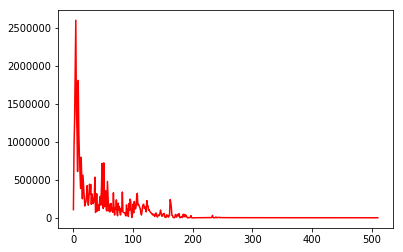

MEAN:  381416.4571947515
MAX :  1810244.389779503
short listed len:  26   len original:  26
Key Value pairs: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 610911.2255162067, 8: 1810244.389779503, 9: 1144784.146576813, 10: 823414.4084255316, 11: 586409.8809818994, 12: 387318.6605496393, 13: 799316.0354972824, 14: 525095.4471080849, 15: 0, 16: 562287.2658145928, 17: 427896.8559752918, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 425329.1320013941, 24: 0, 25: 0}


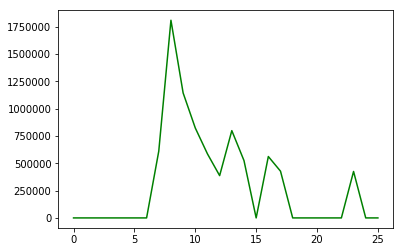

in function filename:  /Users/nawazkh/Masters/Courses/CSCI-B649_Internet_Of_Things/FinalProject/truck-audioset/trucks/5perV0v6lkk.wav
monon/stereo :  (441000, 2)
fftshape:  (1024,)
fftlen:  1024


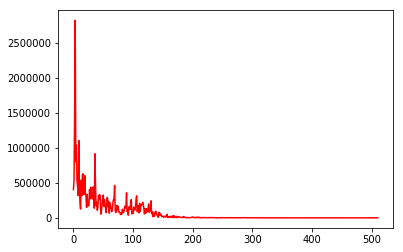

MEAN:  290828.9601010844
MAX :  1105907.5368969808
short listed len:  26   len original:  26
Key Value pairs: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 449312.0486629279, 8: 320512.7101749881, 9: 1105907.5368969808, 10: 438743.0618464508, 11: 0, 12: 0, 13: 538719.6578870666, 14: 317163.7026113171, 15: 618483.7306014341, 16: 631007.3510384352, 17: 334224.36897651816, 18: 337194.5598864176, 19: 604290.343833731, 20: 356990.9677598601, 21: 323909.3070897025, 22: 0, 23: 336905.8460903382, 24: 0, 25: 0}


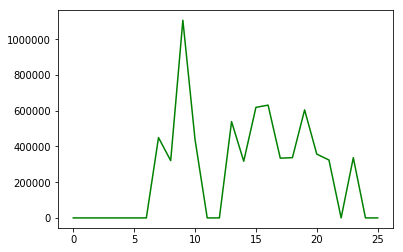

in function filename:  /Users/nawazkh/Masters/Courses/CSCI-B649_Internet_Of_Things/FinalProject/truck-audioset/trucks/0XnlJAdG5e8.wav
monon/stereo :  (441000, 2)
fftshape:  (1024,)
fftlen:  1024


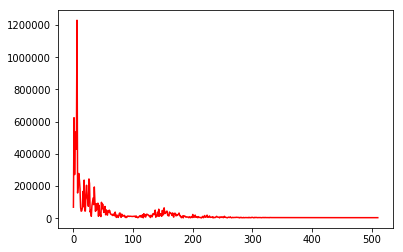

MEAN:  97434.40371224898
MAX :  277876.5012388348
short listed len:  26   len original:  26
Key Value pairs: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 156586.2371541432, 8: 223294.71549361284, 9: 277876.5012388348, 10: 239587.5004559364, 11: 185171.90999273924, 12: 0, 13: 0, 14: 0, 15: 0, 16: 166478.71808638942, 17: 0, 18: 236613.20160678052, 19: 0, 20: 0, 21: 145043.00324395948, 22: 204495.5855914977, 23: 130926.17449484364, 24: 112653.36864399101, 25: 0}


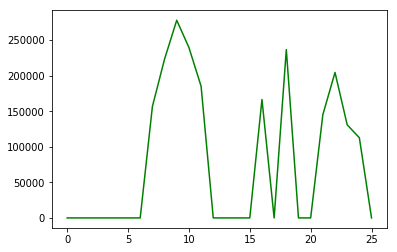

in function filename:  /Users/nawazkh/Masters/Courses/CSCI-B649_Internet_Of_Things/FinalProject/truck-audioset/trucks/5ftfKerE6s0.wav
monon/stereo :  (480000, 2)
fftshape:  (1024,)
fftlen:  1024


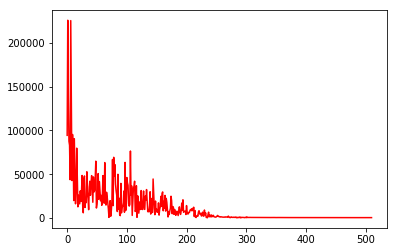

MEAN:  34348.38559509524
MAX :  140152.61492159334
short listed len:  26   len original:  26
Key Value pairs: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 140152.61492159334, 8: 42804.114573969586, 9: 95326.94092122737, 10: 77121.26665815692, 11: 0, 12: 90593.23942949236, 13: 52517.36447493693, 14: 0, 15: 0, 16: 79765.68663872944, 17: 43630.61588287106, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 48597.72248285261}


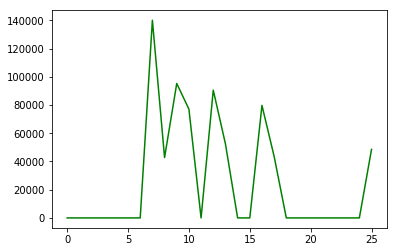

in function filename:  /Users/nawazkh/Masters/Courses/CSCI-B649_Internet_Of_Things/FinalProject/truck-audioset/trucks/1PM96hV5XMo.wav
monon/stereo :  (441000, 2)
fftshape:  (1024,)
fftlen:  1024


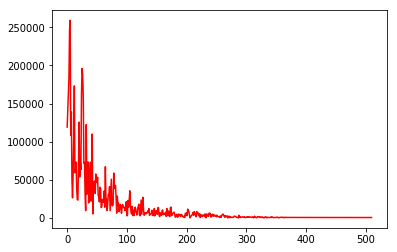

MEAN:  60916.728048107594
MAX :  196084.59030033954
short listed len:  26   len original:  26
Key Value pairs: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 138887.95851589477, 8: 0, 9: 0, 10: 0, 11: 107140.67494571679, 12: 173192.3393295794, 13: 0, 14: 62498.91194055137, 15: 73420.77147301837, 16: 0, 17: 0, 18: 0, 19: 73020.39393439359, 20: 125773.55090030536, 21: 0, 22: 73006.82540619328, 23: 63337.63980794038, 24: 162731.29253075214, 25: 196084.59030033954}


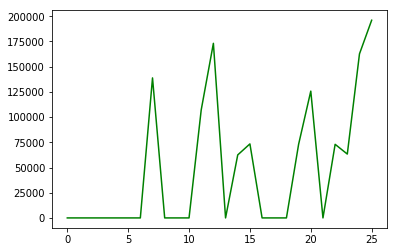

in function filename:  /Users/nawazkh/Masters/Courses/CSCI-B649_Internet_Of_Things/FinalProject/truck-audioset/trucks/-DNkAalo7og.wav
monon/stereo :  (441000,)
fftshape:  (1024,)
fftlen:  1024


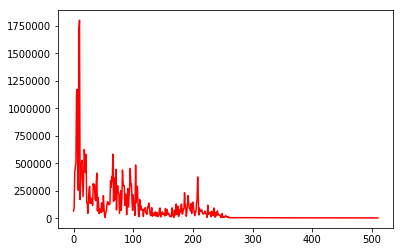

MEAN:  360213.0421261069
MAX :  1800595.827623119
short listed len:  26   len original:  26
Key Value pairs: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 435422.941044887, 8: 0, 9: 1712980.2668041876, 10: 1800595.827623119, 11: 0, 12: 0, 13: 487958.5869648251, 14: 528470.3618016938, 15: 365813.07136654796, 16: 0, 17: 409194.6752051978, 18: 625984.299822297, 19: 531840.373285064, 20: 416150.5020628456, 21: 581836.7990185407, 22: 0, 23: 0, 24: 0, 25: 0}


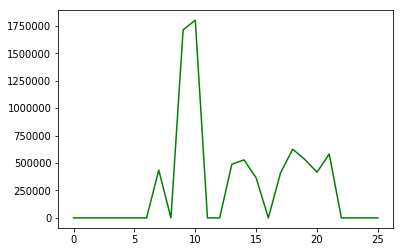

in function filename:  /Users/nawazkh/Masters/Courses/CSCI-B649_Internet_Of_Things/FinalProject/truck-audioset/trucks/0yZgsUq3yWY.wav
monon/stereo :  (441000, 2)
fftshape:  (1024,)
fftlen:  1024


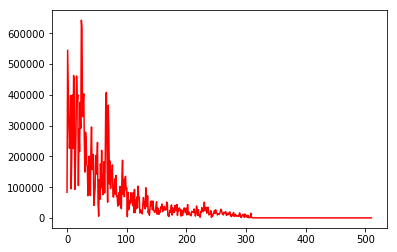

MEAN:  237257.61588383286
MAX :  642392.6973355289
short listed len:  26   len original:  26
Key Value pairs: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 399442.51604760496, 10: 0, 11: 462746.55802483147, 12: 447554.4226275126, 13: 0, 14: 0, 15: 277576.04074210103, 16: 461112.8362835549, 17: 380481.38325819426, 18: 399682.9531987551, 19: 0, 20: 289762.30831123877, 21: 0, 22: 376455.5168760989, 23: 290967.6456043603, 24: 642392.6973355289, 25: 615171.5131788603}


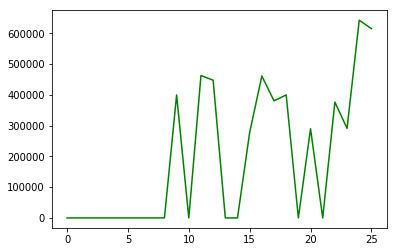

in function filename:  /Users/nawazkh/Masters/Courses/CSCI-B649_Internet_Of_Things/FinalProject/truck-audioset/trucks/-2PDE7hUArE.wav
monon/stereo :  (441000,)
fftshape:  (1024,)
fftlen:  1024


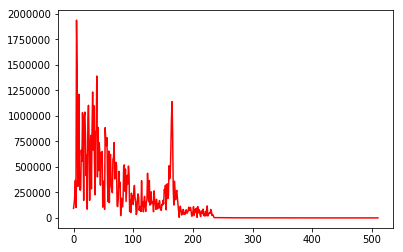

MEAN:  467261.7126674401
MAX :  1209810.8345415012
short listed len:  26   len original:  26
Key Value pairs: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 529317.1726390041, 9: 1209810.8345415012, 10: 0, 11: 0, 12: 0, 13: 665007.2349595124, 14: 554652.0646303006, 15: 1031311.7414541137, 16: 798416.8409069641, 17: 0, 18: 994031.2047090076, 19: 1036341.376650539, 20: 800938.3149345682, 21: 0, 22: 616890.1036639289, 23: 0, 24: 956878.5846264804, 25: 1102959.458989515}


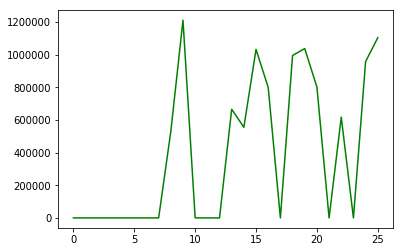

in function filename:  /Users/nawazkh/Masters/Courses/CSCI-B649_Internet_Of_Things/FinalProject/truck-audioset/trucks/0ix_rHxU54w.wav
monon/stereo :  (441000, 2)
fftshape:  (1024,)
fftlen:  1024


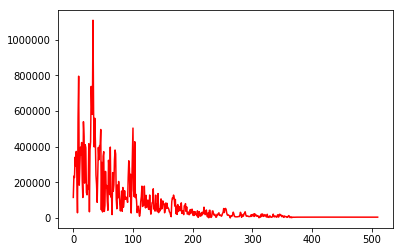

MEAN:  229804.84026104555
MAX :  795038.5251339017
short listed len:  26   len original:  26
Key Value pairs: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 559654.0783798551, 9: 795038.5251339017, 10: 0, 11: 294859.2828186055, 12: 397008.4783309108, 13: 352870.88217975205, 14: 423084.35645266855, 15: 0, 16: 0, 17: 539824.3470954947, 18: 456802.0905639858, 19: 0, 20: 410861.7545202985, 21: 393923.0303523054, 22: 0, 23: 0, 24: 0, 25: 0}


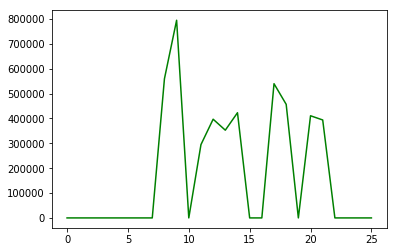

in function filename:  /Users/nawazkh/Masters/Courses/CSCI-B649_Internet_Of_Things/FinalProject/truck-audioset/trucks/0XrVauCq9JU.wav
monon/stereo :  (480000,)
fftshape:  (1024,)
fftlen:  1024


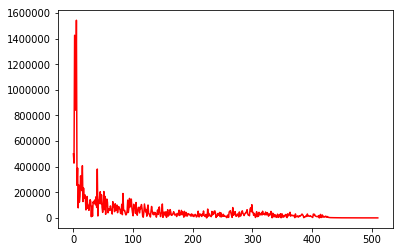

MEAN:  137201.20491706388
MAX :  407911.38196814776
short listed len:  26   len original:  26
Key Value pairs: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 389985.38939139416, 8: 0, 9: 257767.2651572945, 10: 0, 11: 166790.97288195725, 12: 328690.8111327911, 13: 237906.94584272944, 14: 213240.25456977665, 15: 407911.38196814776, 16: 0, 17: 233758.59495753085, 18: 153417.38843188802, 19: 182141.1126354651, 20: 154845.8795294045, 21: 0, 22: 0, 23: 167988.66310735836, 24: 0, 25: 0}


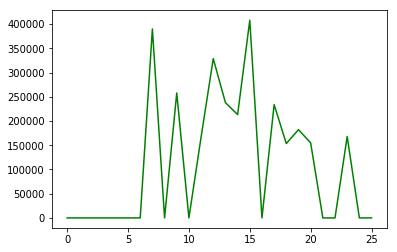

In [194]:
import glob

list_collection = []
dir_path = '/Users/nawazkh/Masters/Courses/CSCI-B649_Internet_Of_Things/FinalProject/truck-audioset/trucks/'
for wavf in glob.glob(dir_path+'*.wav'):
#     print 'filename ', wavf
    coll = find_prominent_freqeuencies(wavf)
    list_collection.append(coll)
    

In [153]:
# def check_range(val):
#     for i in range(200, 791,10):
#         if val >= i and val <(i+10):
#             return i


def check_range(val):
    for i in range(7, 25,1):
        if val >= i and val <(i+10):
            return i

# print check_range(199)
# print check_range(799)
# print check_range(800)
# print check_range(801)

In [259]:
coll2 = {}
for i,coll in enumerate(list_collection):
#     print coll
#     print i, 'th colletion: '
#     print coll.keys()
    for k in coll.keys():
        if k >= 7 and coll[k] > 1.0:
            if k in coll2:
                coll2[k] = (coll2[k][0]+1,coll2[k][1]+coll[k])
            else:
                coll2[k] = (1, coll[k])
                
for k in coll2.keys():
    coll2[k] = (coll2[k][0]/(10*19) , coll2[k][1]/(coll2[k][0]))
#                 
print ('KEYS: ', len(coll2.keys()))
p1 = 1
for key in sorted(coll2):
    print ('key: ', key , ' val: ', coll2[key])
#     print (key,',')
    p1 = p1*coll2[k][0]

KEYS:  19
key:  7  val:  (0.03684210526315789, 331608.34502957814)
key:  8  val:  (0.031578947368421054, 580971.1968401554)
key:  9  val:  (0.04736842105263158, 777659.3925909274)
key:  10  val:  (0.02631578947368421, 675892.4130018388)
key:  11  val:  (0.031578947368421054, 300519.8799409582)
key:  12  val:  (0.031578947368421054, 304059.6585666542)
key:  13  val:  (0.03684210526315789, 447756.67254372925)
key:  14  val:  (0.03684210526315789, 374886.4427306276)
key:  15  val:  (0.031578947368421054, 462419.4562675604)
key:  16  val:  (0.031578947368421054, 449844.783128111)
key:  17  val:  (0.03684210526315789, 338430.1201930141)
key:  18  val:  (0.03684210526315789, 457675.0997455903)
key:  19  val:  (0.02631578947368421, 485526.72006783856)
key:  20  val:  (0.03684210526315789, 365046.1825740744)
key:  21  val:  (0.021052631578947368, 361178.034926127)
key:  22  val:  (0.021052631578947368, 317712.00788442965)
key:  23  val:  (0.031578947368421054, 235909.18351770585)
key:  24  val

In [260]:
def print_Probability(myFile):
    truck_d = find_prominent_freqeuencies(myFile)
    td = {}
    for k in truck_d.keys():
            if  k >= 7 and truck_d[k] > 1.0:
                if k in td:
                    td[k] = (td[k][0]+1,td[k][1]+truck_d[k])
                else:
                    td[k] = (1, truck_d[k])

    for k in td.keys():
        td[k] = (td[k][0]/19, td[k][1]/td[k][0])
#         print ('td[k]',td[k])
    for key in sorted(td.keys()):
        print ('key: ', key , ' val: ', td[key])
    p2 = 1.0
    modified_p = 1.0
    for k in td.keys():
    #     print ('Key: ',k , '  values:', td[k])
        if k >= 7:
            if(td[k][1] <= coll2[k][1]):
                p2 = p2*td[k][0]
                modified_p = modified_p*coll2[k][0]
                print ('coll2[k][0]',coll2[k][0])
            else:
                p2 = p2*0.01
                modified_p = modified_p*coll2[k][0]
    print ('p2',p2,'modified_p',modified_p)
    prob_truck = 0.5
    Output_prob = (prob_truck*modified_p)/p2
    print ('Truck Probability : ',Output_prob)

in function filename:  /Users/nawazkh/Masters/Courses/CSCI-B649_Internet_Of_Things/FinalProject/truck-audioset/noisy-data-set/truck/Truck-1-10-.wav
monon/stereo :  (44100,)
fftshape:  (1024,)
fftlen:  1024


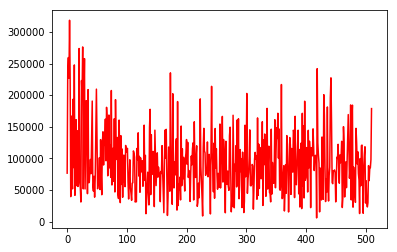

MEAN:  87109.60445940372
MAX :  273716.4656768056
short listed len:  26   len original:  26
Key Value pairs: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 166789.75050844558, 8: 0, 9: 0, 10: 193580.2065975035, 11: 0, 12: 247724.51697211998, 13: 0, 14: 0, 15: 161089.42929832893, 16: 0, 17: 143537.07045255476, 18: 0, 19: 0, 20: 273716.4656768056, 21: 0, 22: 0, 23: 0, 24: 223043.5891348495, 25: 198503.35774153142}


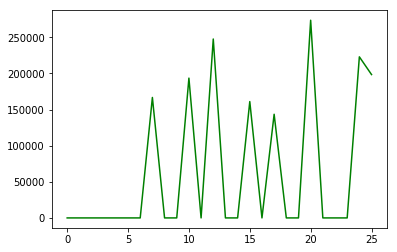

key:  7  val:  (0.05263157894736842, 166789.75050844558)
key:  10  val:  (0.05263157894736842, 193580.2065975035)
key:  12  val:  (0.05263157894736842, 247724.51697211998)
key:  15  val:  (0.05263157894736842, 161089.42929832893)
key:  17  val:  (0.05263157894736842, 143537.07045255476)
key:  20  val:  (0.05263157894736842, 273716.4656768056)
key:  24  val:  (0.05263157894736842, 223043.5891348495)
key:  25  val:  (0.05263157894736842, 198503.35774153142)
coll2[k][0] 0.03684210526315789
coll2[k][0] 0.02631578947368421
coll2[k][0] 0.031578947368421054
coll2[k][0] 0.031578947368421054
coll2[k][0] 0.03684210526315789
coll2[k][0] 0.03684210526315789
coll2[k][0] 0.021052631578947368
coll2[k][0] 0.021052631578947368
p2 5.888045974722152e-11 modified_p 5.81644733566953e-13
Truck Probability :  0.0049392
----------------------------------
in function filename:  /Users/nawazkh/Masters/Courses/CSCI-B649_Internet_Of_Things/FinalProject/truck-audioset/noisy-data-set/non_truck/Non-Truck-2-02-.wav
m

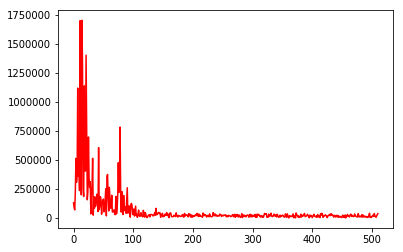

MEAN:  523479.82199144724
MAX :  1704910.5835224572
short listed len:  26   len original:  26
Key Value pairs: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 1120183.3235275815, 8: 0, 9: 0, 10: 0, 11: 1701106.1800863824, 12: 829964.8194267626, 13: 0, 14: 1704910.5835224572, 15: 1334745.2907221946, 16: 0, 17: 0, 18: 1139326.1759610286, 19: 0, 20: 0, 21: 1403739.6175113097, 22: 748022.6260141103, 23: 0, 24: 0, 25: 698511.9921388024}


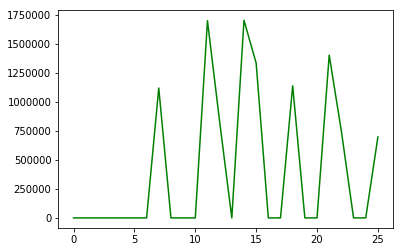

key:  7  val:  (0.05263157894736842, 1120183.3235275815)
key:  11  val:  (0.05263157894736842, 1701106.1800863824)
key:  12  val:  (0.05263157894736842, 829964.8194267626)
key:  14  val:  (0.05263157894736842, 1704910.5835224572)
key:  15  val:  (0.05263157894736842, 1334745.2907221946)
key:  18  val:  (0.05263157894736842, 1139326.1759610286)
key:  21  val:  (0.05263157894736842, 1403739.6175113097)
key:  22  val:  (0.05263157894736842, 748022.6260141103)
key:  25  val:  (0.05263157894736842, 698511.9921388024)
p2 1.0000000000000003e-18 modified_p 1.469418274274408e-14
Truck Probability :  7347.091371372038


In [261]:
# new_truck_audio = '/Users/nawazkh/Masters/Courses/CSCI-B649_Internet_Of_Things/FinalProject/truck-audioset/noisy-data-set/truck/Truck-1-01-.wav'
new_truck_audio = '/Users/nawazkh/Masters/Courses/CSCI-B649_Internet_Of_Things/FinalProject/truck-audioset/noisy-data-set/truck/Truck-1-10-.wav'
new_nontruck_audio = '/Users/nawazkh/Masters/Courses/CSCI-B649_Internet_Of_Things/FinalProject/truck-audioset/noisy-data-set/non_truck/Non-Truck-2-02-.wav'

# for myFile in glob.glob(new_truck_audio+"*.wav"):
print_Probability(new_truck_audio)
print ('----------------------------------')
print_Probability(new_nontruck_audio)




# #######

# truck_d  = find_prominent_freqeuencies(new_nontruck_audio)
# td1 = {}
# for k in truck_d.keys():
#         if  k >=200 and truck_d[k] > 0.0:
#             ke = check_range(k)
#             if ke in td1:
#                 td1[ke] = (td1[ke][0]+1,td1[ke][1]+truck_d[k])
#             else:
#                 td1[ke] = (1, truck_d[k])
                
# for k in td1.keys():
#     td1[k] = (td1[k][0]/10.0 , td1[k][1]/td1[k][0])
# p2 = 0.001
# for k in td1.keys():
# #     print ('Key: ',k , '  values:', td1[k])
#     if(td1[k][0] < coll2[k][0]):
#         p2 = p2*0.0001
#     else:
#         p2 = p2*td1[k][0]

# prob_truck = 0.5
# Output_prob = (0.5*p1)/p2
# print ('Output Probability : ',Output_prob)
# print ('----------------------------------')
# print ('----------------------------------')